# Clustering Gijs

In [1]:
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns

fragmenten_df = pd.read_csv('Data/fragments_data.csv')
birchFragmenten_df = fragmenten_df.copy()
birchFragmenten_df.head()

,fragment,labels,label_numeric
0,05190.100417.watersniproepEempolder_fragment_0...,watersnip,0
1,05190.100417.watersniproepEempolder_fragment_1...,watersnip,0
2,05190.100417.watersniproepEempolder_fragment_2...,watersnip,0
3,05190.100417.watersniproepEempolder_fragment_3...,watersnip,0
4,05190.100417.watersniproepEempolder_fragment_4...,watersnip,0


In [2]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(birchFragmenten_df, test_size=0.3, random_state=42)
test_data.head()

,fragment,labels,label_numeric
948,XC466471-Redshank (2)_fragment_0.wav,tureluur,1
3036,XC749107-2022-09-14 2020 Oeverlopers_fragment_...,oeverloper,4
1960,XC590410-200918_0480_2257_Watersnip_fragment_1...,watersnip,0
3543,XC834752-01.-1950-2050-watersnip_fragment_5.wav,watersnip,0
1689,"XC561755-Oeverloper, flight call, IGS, 050520,...",oeverloper,4


In [3]:
label_counts = test_data['labels'].value_counts()
print(label_counts)

labels
tureluur                  362
oeverloper                256
witgat                    202
watersnip                 170
zwarte ruiter             149
geelpootruiter             11
grauwe franjepoot          10
steenloper                  7
steltloper                  3
amerikaanse oeverloper      1
Name: count, dtype: int64


In [4]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd
from scipy.signal import stft
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

    


In [6]:
# Initialize the features and filenames lists
features = []
filenames = []

for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)

    stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))

    feature_vector = np.concatenate([mfcc_mean, chroma_mean, [stft_librosa_mean]])
    features.append(feature_vector)
    filenames.append(fragment)

features = np.array(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

distance_matrix = squareform(pdist(features, metric='euclidean'))


c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
c:\Users\Gijs M

In [7]:
from sklearn.manifold import TSNE

# Ensure features array is valid before applying t-SNE
if np.isnan(features).any() or np.isinf(features).any():
    print("Error: Features array contains NaN or infinite values. Please check your data.")
else:
    tsne = TSNE(n_components=2, random_state=42)
    features_tsne = tsne.fit_transform(features)

c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Het systeem kan het opgegeven bestand niet vinden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Gijs Minnen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Gijs Minnen\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gijs Minnen\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Gijs Minnen\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
  

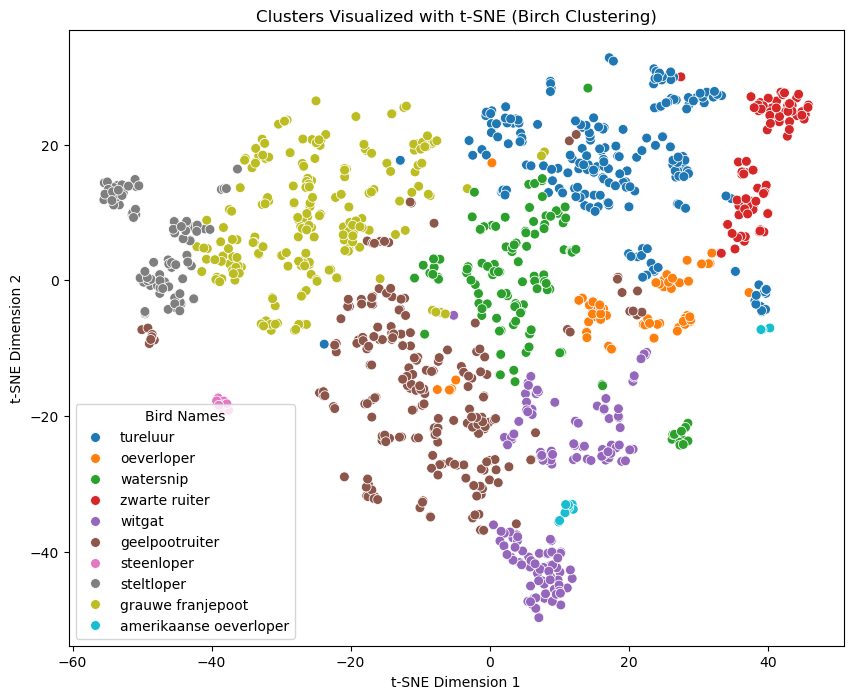

In [19]:
# Pas Birch clustering toe op de features
birch.set_params(n_clusters=10)
birch_labels = birch.fit_predict(features)

# Voeg de labels toe aan de dataset
species_labels_birch = [
    'Onbekend' if label == -1 else test_data.loc[test_data['cluster'] == label, 'cluster_name'].iloc[0] if label in test_data['cluster'].values else 'Onbekend'
    for label in birch_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_birch = [i for i, label in enumerate(species_labels_birch) if label != 'Onbekend']
filtered_features_tsne_birch = features_tsne[filtered_indices_birch]
filtered_species_labels_birch = [species_labels_birch[i] for i in filtered_indices_birch]

# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=filtered_features_tsne_birch[:, 0],
    y=filtered_features_tsne_birch[:, 1],
    hue=filtered_species_labels_birch,
    palette='tab10',
    s=50
)
plt.title("Clusters Visualized with t-SNE (Birch Clustering)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Bird Names", loc='best')
plt.show()


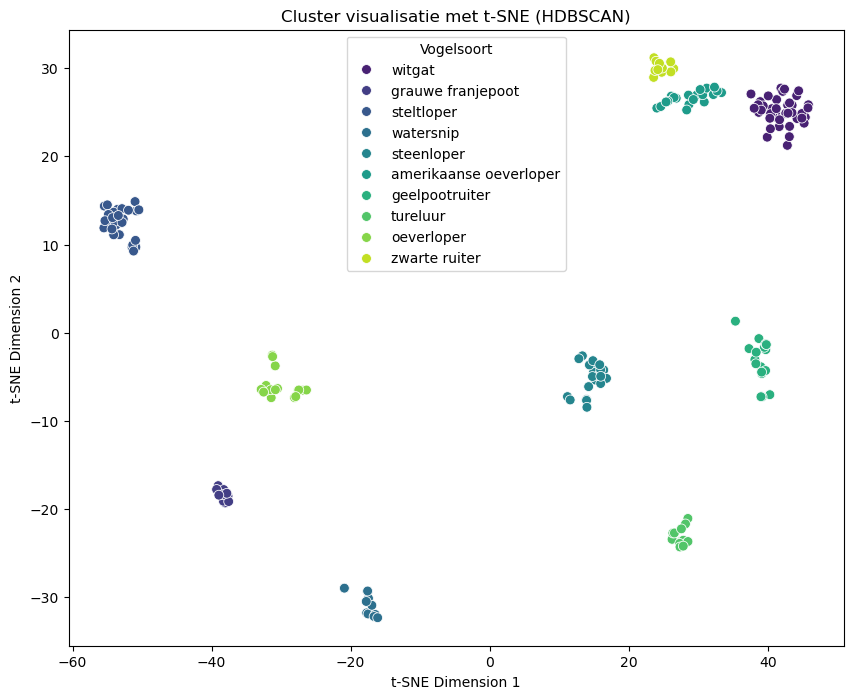

In [13]:
import hdbscan

# Pas HDBSCAN toe op de t-SNE features
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean')
hdbscan_labels = hdbscan_clusterer.fit_predict(features_tsne)

# Voeg de labels toe aan de dataset
species_labels_hdbscan = ['Onbekend' if label == -1 else test_data.loc[test_data['cluster'] == label, 'cluster_name'].iloc[0] if label in test_data['cluster'].values else 'Onbekend' for label in hdbscan_labels]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_hdbscan = [i for i, label in enumerate(species_labels_hdbscan) if label != 'Onbekend']
filtered_features_tsne_hdbscan = features_tsne[filtered_indices_hdbscan]
filtered_species_labels_hdbscan = [species_labels_hdbscan[i] for i in filtered_indices_hdbscan]

# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_hdbscan[:, 0], y=filtered_features_tsne_hdbscan[:, 1], hue=filtered_species_labels_hdbscan, palette='viridis', s=50)
plt.title("Cluster visualisatie met t-SNE (HDBSCAN)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Vogelsoort", loc='best')
plt.show()

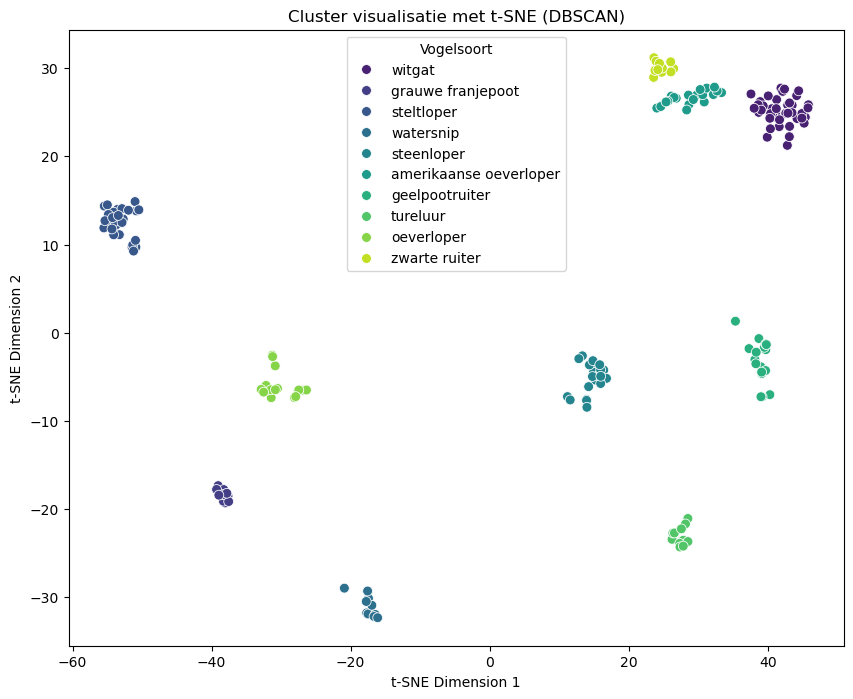

In [14]:
from sklearn.cluster import DBSCAN

# Pas DBSCAN toe op de t-SNE features
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_tsne)

# Voeg de labels toe aan de dataset
species_labels = ['Onbekend' if label == -1 else test_data.loc[test_data['cluster'] == label, 'cluster_name'].iloc[0] if label in test_data['cluster'].values else 'Onbekend' for label in hdbscan_labels]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices = [i for i, label in enumerate(species_labels) if label != 'Onbekend']
filtered_features_tsne = features_tsne[filtered_indices]
filtered_species_labels = [species_labels[i] for i in filtered_indices]

# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne[:, 0], y=filtered_features_tsne[:, 1], hue=filtered_species_labels, palette='viridis', s=50)
plt.title("Cluster visualisatie met t-SNE (DBSCAN)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Vogelsoort", loc='best')
plt.show()
